In [3]:
import pandas as pd
import pyxlsb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

#### Chargement de la data et conversion en dataframe

In [4]:
with pyxlsb.open_workbook('C:/Users/Abir/Desktop/stage_uib/Data.xlsb') as wb:
    with wb.get_sheet(1) as sheet:  # Specify the sheet number or name you want to read
        data = []
        for row in sheet.rows():
            data.append([item.v for item in row])

In [5]:
df = pd.DataFrame(data[2:], columns=data[1])

## Data Understanding 

In [6]:
#suppression de la dernière ligne car elle est vide
df = df.drop(df.index[-1])

In [7]:
#drop la dernière colonne car elle est vide
df = df.drop(df.columns[-1], axis=1)

In [8]:
df

,OSN,CHRONO,DATE_RCPT,HEUR_RCPT,REF,NUM_RPT,ETAT,MNT,DEV,DATE_VAL,...,INFO,FRAIS,chps_57,chps_72,chps_52A,adr_do,pays_do,N_DOSS,CODE_BP,CHA_2511
0,0000000000,9450152,20/06/2023,06:53:00,TRSF313170002700,RPT23026730,TR,"150000,",EUR,20/06/2023,...,/ROC/TRSF313170002700///URI/Z NAUT,OUR,UIBKTNTTXXX,,CEPAFRPP313,2/80 AVENUE DU GENERAL LECLERC,3/FR/33260 LA TESTE DE BUCH,RPT23026730,1721 _VRT ENTRE CED&CEDC CHEZ I.A #,00055001633_25110201
1,1874193793,9450153,20/06/2023,06:53:00,TFMI312596000620,RPT23026748,TR,"750,",EUR,20/06/2023,...,FRAIS DE SCOLARITE ET LOGEMENT,OUR,UIBKTNTTXXX,,BNPARERXXXX,2/70 RUE DE CAEN,3/FR/97400 ST DENIS,RPT23026748,0533 _FR D'INSCRIPTION ET ETUDES,00133077172_25310009
2,1874193794,9450154,20/06/2023,06:53:00,3311282073,RPT23026788,TR,"231,22",EUR,20/06/2023,...,0GG1HCGJVODNWKKGC5VT81GKNYF,SHA,,,CITIIE2XXXX,20-22 BEDFORD ROW,GB/LONDON/WC1R 4JS,RPT23026788,0662 _Bail et loyers Autres,00002237784_25110005
3,1809197974,9450155,20/06/2023,06:53:00,3311281904,RPT23026764,TR,"1362,85",EUR,20/06/2023,...,0GG1S7WWL0HLJQL7IHCV86AQ2QD,SHA,,,CITIIE2XXXX,20-22 BEDFORD ROW,GB/LONDON/WC1R 4JS,RPT23026764,0662 _Bail et loyers Autres,01001483567_25110005
4,2480372242,9450156,20/06/2023,06:53:00,3311281990,RPT23026780,TR,"585,11",EUR,20/06/2023,...,0GG2JY7MQU7HCOHOTXHIRUMIYOO,SHA,,,CITIIE2XXXX,20-22 BEDFORD ROW,GB/LONDON/WC1R 4JS,RPT23026780,0662 _Bail et loyers Autres,00133058564_25310009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1639,0209467958,9484065,27/06/2023,15:45:00,TNSM30627H000023,,AT,"15558,00",EUR,30/06/2023,...,INVOICE,SHA,,,,INTERNATIONAL,TUNISIE,,_,_
1640,1883194706,9484066,27/06/2023,15:45:00,SWFT23062500153,,AT,"10000,",TND,03/07/2023,...,Foued Chebbi,OUR,STBKTNTTXXX,,BOUSFRPPXXX,318 RUE SAINT-MARTIN 75003 PARIS FR,ANCE,,_,_
1641,2489373174,9484074,27/06/2023,15:53:00,FDC2306273110100,,AT,"460,68",USD,27/06/2023,...,JUN23PENSION PAYMENT ACC UNION INT,SHA,,,,FUND,NEW YORK NY 10017-2201 US,,_,_
1642,0209467959,9484088,27/06/2023,16:03:00,S0631782A50201,,AT,"12287,9",USD,27/06/2023,...,ORPHAN REACH LTD,SHA,,,LOYDGB2LXXX,THE OLD SCHOOL,MK6 3AP GB,,_,_


In [9]:
df.columns

Index(['OSN', 'CHRONO', 'DATE_RCPT', 'HEUR_RCPT', 'REF', 'NUM_RPT', 'ETAT',
       'MNT', 'DEV', 'DATE_VAL', 'TAU_DEV', 'CV_TND', 'COMMISSIONS', 'TYPE',
       'PAYS', 'GESTINNAIRE', 'CLIENT', 'CHAPITRE', 'SEGMENT', 'UTILISATEUR',
       'D_EXEC', 'BEN_delta', 'BEN_mt103', 'ADR_bnf', 'AGE', 'NCP', 'LIBE',
       'LIB_SEG', 'ACCES_SDM', 'EXPED', 'DO', 'NOM_DO', 'chps_53A', 'chps_54A',
       'INFO', 'FRAIS', 'chps_57', 'chps_72', 'chps_52A', 'adr_do', 'pays_do',
       'N_DOSS', 'CODE_BP', 'CHA_2511'],
      dtype='object')

In [10]:
df['ETAT'].unique()

array(['TR', 'AT'], dtype=object)

In [11]:
df["DEV"].unique()

array(['EUR', 'USD', 'CHF', 'SEK', 'TND', 'GBP', 'CAD'], dtype=object)

In [12]:
occurrences = df["DEV"].value_counts()
print(occurrences)

EUR    1051
TND     308
USD     218
CHF      37
CAD      15
GBP      12
SEK       3
Name: DEV, dtype: int64


In [13]:
df["CHAPITRE"].unique()

array(['25110201', '25310009', '25110005', '25110102', '25110002',
       '25110203', '25110101', '', '25310000', '25110003', '25110112',
       '25310008', '25110014', '36510000', '25110212', '25310010',
       '25110200', '25110204', '26200045', '32200001', '25110229',
       '25110008', '25310012', '25110010', '25310002', '25110202',
       '25310013'], dtype=object)

In [14]:
df['ACCES_SDM'].unique()

array(['O', 'N', ''], dtype=object)

In [15]:
df['TYPE'].unique()

array(['721_RPT-SANS FRAIS-FIXING', '304_FIN-FIXING', '302_COM-FIXING',
       '_', '314_FIN-NEGOCIE', '741_RPT-SANS FRAIS-NEGOCIE',
       '312_COM-NEGOCIE', '324_FIN-VALEUR JOUR',
       '743_RPT-SANS FRAIS- VALEUR JOUR', '322_COM-VALEUR JOUR'],
      dtype=object)

In [16]:
df = df.drop('chps_54A',axis=1)
df = df.drop('chps_52A',axis=1)
df = df.drop('chps_57',axis=1)
df = df.drop('chps_53A',axis=1)
df = df.drop('HEUR_RCPT',axis=1)
df = df.drop('DATE_VAL',axis=1)
df = df.drop('COMMISSIONS',axis=1)
df = df.drop('CLIENT',axis=1)
df = df.drop('SEGMENT',axis=1)
df = df.drop('CHAPITRE',axis=1)
df = df.drop('BEN_mt103',axis=1)
df = df.drop('LIBE',axis=1)
df = df.drop('INFO',axis=1)
df = df.drop('FRAIS',axis=1)
#frais a verifier
df = df.drop('N_DOSS',axis=1)
df = df.drop('LIB_SEG',axis=1)
df = df.drop('DATE_RCPT',axis=1)
df = df.drop('NUM_RPT',axis=1)
df = df.drop('D_EXEC',axis=1)
df = df.drop('CHA_2511',axis=1)
df = df.drop('EXPED',axis=1)
df = df.drop('DO',axis=1) 
df = df.drop('adr_do',axis=1)  
df = df.drop('UTILISATEUR',axis=1)

In [17]:
df.columns

Index(['OSN', 'CHRONO', 'REF', 'ETAT', 'MNT', 'DEV', 'TAU_DEV', 'CV_TND',
       'TYPE', 'PAYS', 'GESTINNAIRE', 'BEN_delta', 'ADR_bnf', 'AGE', 'NCP',
       'ACCES_SDM', 'NOM_DO', 'chps_72', 'pays_do', 'CODE_BP'],
      dtype='object')

In [18]:
df

,OSN,CHRONO,REF,ETAT,MNT,DEV,TAU_DEV,CV_TND,TYPE,PAYS,GESTINNAIRE,BEN_delta,ADR_bnf,AGE,NCP,ACCES_SDM,NOM_DO,chps_72,pays_do,CODE_BP
0,0000000000,9450152,TRSF313170002700,TR,"150000,",EUR,"3,3466",150000,721_RPT-SANS FRAIS-FIXING,788_TUNISIE,799_KAHLOUL ASMA,Z MARINE TUNISIE,:70:/ROC/TRSF313170002700///URI/Z NAUTI C - ZMT 2,00036,/TN5912036000005500163383,O,1/1/Z NAUTIC,,3/FR/33260 LA TESTE DE BUCH,1721 _VRT ENTRE CED&CEDC CHEZ I.A #
1,1874193793,9450153,TFMI312596000620,TR,"750,",EUR,"3,3026","2476,95",721_RPT-SANS FRAIS-FIXING,788_TUNISIE,464_FERIEL BAGHDADI,TRIFI HAFTHI,3/TN/TUNISIE :70:FRAIS DE SCOLARITE ET LOGEMENT,00024,:/TN5912024000013307717203,N,1/MONSIEUR CHATILLON JEAN,,3/FR/97400 ST DENIS,0533 _FR D'INSCRIPTION ET ETUDES
2,1874193794,9450154,3311282073,TR,"231,22",EUR,"3,3026","727,927",304_FIN-FIXING,788_TUNISIE,321_INES CHIHAOUI,CATALIOTI MAURIZIO,HAWEDEF N. 52 TOZEUR,00120,/TN5912120000000223778449,N,AIRBNB PAYMENTS UK LTD,,GB/LONDON/WC1R 4JS,0662 _Bail et loyers Autres
3,1809197974,9450155,3311281904,TR,"1362,85",EUR,"3,3026","4459,902",304_FIN-FIXING,788_TUNISIE,003_JOUDA RAOUDHA,KHEMISSI DELILA,APT2 RUE DE PALESTINE TUNIS,00000,/TN5912000000100148356741,N,AIRBNB PAYMENTS UK LTD,,GB/LONDON/WC1R 4JS,0662 _Bail et loyers Autres
4,2480372242,9450156,3311281990,TR,"585,11",EUR,"3,3026","1896,684",304_FIN-FIXING,788_TUNISIE,675_RAMZI BCHIR,NABI MANEL,RUE SALME BECHRI MONASTIR,00502,/TN5912502000013305856476,,AIRBNB PAYMENTS UK LTD,,GB/LONDON/WC1R 4JS,0662 _Bail et loyers Autres
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1639,0209467958,9484065,TNSM30627H000023,AT,"15558,00",EUR,,,_,_,_,STE GRAVIC TUNITEC,:70:INVOICE :71A:SHA,00904,/TN5912904000005500147118,O,TUNISIAN TELECOM ELECTRIQUE,,TUNISIE,_
1640,1883194706,9484066,SWFT23062500153,AT,"10000,",TND,,,_,_,_,,0 Avenue Louis Braille 1003 Tunis T UNISIE,,/TN5910300031517679178815,,CHEBBI FOUED,,ANCE,_
1641,2489373174,9484074,FDC2306273110100,AT,"460,68",USD,,,_,_,_,TARHOUNI ZOHRA,24 RUE DU PERSAN TUNIS 1008 TN :70:JUN23PENSIO...,00100,/TN5912100000190103319259,N,UNITED NATIONS JOINT STAFF PENSION,,NEW YORK NY 10017-2201 US,_
1642,0209467959,9484088,S0631782A50201,AT,"12287,9",USD,,,_,_,_,MONITORING CONSULTING TUNISIA,:70:ORPHAN REACH LTD :71A:SHA,00035,/TN5912035000005500151497,O,EMMES BIOPHARMA UK LIMITED,,MK6 3AP GB,_


In [19]:
df.isnull().sum()

OSN            0
CHRONO         0
REF            0
ETAT           0
MNT            0
DEV            0
TAU_DEV        0
CV_TND         0
TYPE           0
PAYS           0
GESTINNAIRE    0
BEN_delta      0
ADR_bnf        0
AGE            0
NCP            0
ACCES_SDM      0
NOM_DO         0
chps_72        0
pays_do        0
CODE_BP        0
dtype: int64

In [20]:
df.isnull().values.any()

False

## Data Cleaning

In [21]:
df=df.replace('',np.NaN)
df=df.replace('_',np.NaN)

In [22]:
df.describe()

,OSN,CHRONO,REF,ETAT,MNT,DEV,TAU_DEV,CV_TND,TYPE,PAYS,GESTINNAIRE,BEN_delta,ADR_bnf,AGE,NCP,ACCES_SDM,NOM_DO,chps_72,pays_do,CODE_BP
count,1644,1644,1644,1644,1644,1644,1169,1169,1169,1169,1169,1334,1644,1341,1644,875,1644,565,1644,1169
unique,989,1596,1596,2,1291,7,63,1075,9,31,311,862,1393,133,1228,2,1189,126,1014,24
top,0000000000,9450235,ALT36K0001SAC706,TR,"1000,",EUR,"3,3437","9907,8",302_COM-FIXING,788_TUNISIE,793_NAOUAL MRAD,CHAKIRA CABLE,1001 TUNIS 40 RUE DU 18 JANVIER 195 2,00026,/TN5912026000003300152520,O,CNSS,/INS/COBADEFFXXX,MAROC,1721 _VRT ENTRE CED&CEDC CHEZ I.A #
freq,629,4,4,1363,25,1051,276,5,440,990,78,28,28,145,28,543,52,75,60,260


In [23]:
df.isnull().sum()

OSN               0
CHRONO            0
REF               0
ETAT              0
MNT               0
DEV               0
TAU_DEV         475
CV_TND          475
TYPE            475
PAYS            475
GESTINNAIRE     475
BEN_delta       310
ADR_bnf           0
AGE             303
NCP               0
ACCES_SDM       769
NOM_DO            0
chps_72        1079
pays_do           0
CODE_BP         475
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1644 entries, 0 to 1643
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   OSN          1644 non-null   object
 1   CHRONO       1644 non-null   object
 2   REF          1644 non-null   object
 3   ETAT         1644 non-null   object
 4   MNT          1644 non-null   object
 5   DEV          1644 non-null   object
 6   TAU_DEV      1169 non-null   object
 7   CV_TND       1169 non-null   object
 8   TYPE         1169 non-null   object
 9   PAYS         1169 non-null   object
 10  GESTINNAIRE  1169 non-null   object
 11  BEN_delta    1334 non-null   object
 12  ADR_bnf      1644 non-null   object
 13  AGE          1341 non-null   object
 14  NCP          1644 non-null   object
 15  ACCES_SDM    875 non-null    object
 16  NOM_DO       1644 non-null   object
 17  chps_72      565 non-null    object
 18  pays_do      1644 non-null   object
 19  CODE_BP      1169 non-null 

In [25]:
import pandas as pd

# Fill missing values with mode
df.fillna(df.mode().iloc[0], inplace=True)

In [26]:
df.isnull().sum()

OSN            0
CHRONO         0
REF            0
ETAT           0
MNT            0
DEV            0
TAU_DEV        0
CV_TND         0
TYPE           0
PAYS           0
GESTINNAIRE    0
BEN_delta      0
ADR_bnf        0
AGE            0
NCP            0
ACCES_SDM      0
NOM_DO         0
chps_72        0
pays_do        0
CODE_BP        0
dtype: int64

In [27]:
import pandas as pd
import re

# Define a function to extract the number alone
def extract_number(column):
    column = str(column)
    number_pattern = r'^(\d+)'
    number_match = re.search(number_pattern, column)
    return number_match.group(1) if number_match else None

# Define a function to extract the text alone
def extract_text(column):
    column = str(column)
    text_pattern = r'[^_\d\s]+'
    text_matches = re.findall(text_pattern, column)
    return ' '.join(text_matches) if text_matches else None

# Apply the extraction functions to create new features
df['numberCodeBP'] = df['CODE_BP'].apply(extract_number)
df['textCodeBP'] = df['CODE_BP'].apply(extract_text)

# Drop the original 'CODE_BP' column
df.drop('CODE_BP', axis=1, inplace=True)

# Print the updated DataFrame
print(df)


             OSN   CHRONO               REF ETAT       MNT  DEV TAU_DEV  \
0     0000000000  9450152  TRSF313170002700   TR   150000,  EUR  3,3466   
1     1874193793  9450153  TFMI312596000620   TR      750,  EUR  3,3026   
2     1874193794  9450154        3311282073   TR    231,22  EUR  3,3026   
3     1809197974  9450155        3311281904   TR   1362,85  EUR  3,3026   
4     2480372242  9450156        3311281990   TR    585,11  EUR  3,3026   
...          ...      ...               ...  ...       ...  ...     ...   
1639  0209467958  9484065  TNSM30627H000023   AT  15558,00  EUR  3,3437   
1640  1883194706  9484066   SWFT23062500153   AT    10000,  TND  3,3437   
1641  2489373174  9484074  FDC2306273110100   AT    460,68  USD  3,3437   
1642  0209467959  9484088    S0631782A50201   AT   12287,9  USD  3,3437   
1643  0000000000  9484091    P2957609 207 1   AT  14008,49  TND  3,3437   

        CV_TND                       TYPE         PAYS  ...  \
0       150000  721_RPT-SANS FRAIS-F

In [28]:
#IMPUTING MISSING CATEGORICAL VALUES 
df[['REF']] = df[['REF']].fillna(df['REF'].mode()[0])
df[['ETAT']] = df[['ETAT']].fillna(df['ETAT'].mode()[0])
df[['DEV']] = df[['DEV']].fillna(df['DEV'].mode()[0])
df[['TYPE']] = df[['TYPE']].fillna(df['TYPE'].mode()[0])
df[['PAYS']] = df[['PAYS']].fillna(df['PAYS'].mode()[0])
df[['GESTINNAIRE']] = df[['GESTINNAIRE']].fillna(df['GESTINNAIRE'].mode()[0])
#df[['UTILISATEUR']] = df[['UTILISATEUR']].fillna(df['UTILISATEUR'].mode()[0])
df[['ADR_bnf']] = df[['ADR_bnf']].fillna(df['ADR_bnf'].mode()[0])
df[['NCP']] = df[['NCP']].fillna(df['NCP'].mode()[0])
df[['ACCES_SDM']] = df[['ACCES_SDM']].fillna(df['ACCES_SDM'].mode()[0])
#df[['EXPED']] = df[['EXPED']].fillna(df['EXPED'].mode()[0])
df[['NOM_DO']] = df[['NOM_DO']].fillna(df['NOM_DO'].mode()[0])
df[['chps_72']] = df[['chps_72']].fillna(df['chps_72'].mode()[0])
df[['textCodeBP']] = df[['textCodeBP']].fillna(df['textCodeBP'].mode()[0])
df[['pays_do']] = df[['pays_do']].fillna(df['pays_do'].mode()[0])
df[['BEN_delta']] = df[['BEN_delta']].fillna(df['BEN_delta'].mode()[0])

In [29]:
df

,OSN,CHRONO,REF,ETAT,MNT,DEV,TAU_DEV,CV_TND,TYPE,PAYS,...,BEN_delta,ADR_bnf,AGE,NCP,ACCES_SDM,NOM_DO,chps_72,pays_do,numberCodeBP,textCodeBP
0,0000000000,9450152,TRSF313170002700,TR,"150000,",EUR,"3,3466",150000,721_RPT-SANS FRAIS-FIXING,788_TUNISIE,...,Z MARINE TUNISIE,:70:/ROC/TRSF313170002700///URI/Z NAUTI C - ZMT 2,00036,/TN5912036000005500163383,O,1/1/Z NAUTIC,/INS/COBADEFFXXX,3/FR/33260 LA TESTE DE BUCH,1721,VRT ENTRE CED&CEDC CHEZ I.A #
1,1874193793,9450153,TFMI312596000620,TR,"750,",EUR,"3,3026","2476,95",721_RPT-SANS FRAIS-FIXING,788_TUNISIE,...,TRIFI HAFTHI,3/TN/TUNISIE :70:FRAIS DE SCOLARITE ET LOGEMENT,00024,:/TN5912024000013307717203,N,1/MONSIEUR CHATILLON JEAN,/INS/COBADEFFXXX,3/FR/97400 ST DENIS,0533,FR D'INSCRIPTION ET ETUDES
2,1874193794,9450154,3311282073,TR,"231,22",EUR,"3,3026","727,927",304_FIN-FIXING,788_TUNISIE,...,CATALIOTI MAURIZIO,HAWEDEF N. 52 TOZEUR,00120,/TN5912120000000223778449,N,AIRBNB PAYMENTS UK LTD,/INS/COBADEFFXXX,GB/LONDON/WC1R 4JS,0662,Bail et loyers Autres
3,1809197974,9450155,3311281904,TR,"1362,85",EUR,"3,3026","4459,902",304_FIN-FIXING,788_TUNISIE,...,KHEMISSI DELILA,APT2 RUE DE PALESTINE TUNIS,00000,/TN5912000000100148356741,N,AIRBNB PAYMENTS UK LTD,/INS/COBADEFFXXX,GB/LONDON/WC1R 4JS,0662,Bail et loyers Autres
4,2480372242,9450156,3311281990,TR,"585,11",EUR,"3,3026","1896,684",304_FIN-FIXING,788_TUNISIE,...,NABI MANEL,RUE SALME BECHRI MONASTIR,00502,/TN5912502000013305856476,O,AIRBNB PAYMENTS UK LTD,/INS/COBADEFFXXX,GB/LONDON/WC1R 4JS,0662,Bail et loyers Autres
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1639,0209467958,9484065,TNSM30627H000023,AT,"15558,00",EUR,"3,3437","1615,6",302_COM-FIXING,788_TUNISIE,...,STE GRAVIC TUNITEC,:70:INVOICE :71A:SHA,00904,/TN5912904000005500147118,O,TUNISIAN TELECOM ELECTRIQUE,/INS/COBADEFFXXX,TUNISIE,1721,VRT ENTRE CED&CEDC CHEZ I.A #
1640,1883194706,9484066,SWFT23062500153,AT,"10000,",TND,"3,3437","1615,6",302_COM-FIXING,788_TUNISIE,...,CHAKIRA CABLE,0 Avenue Louis Braille 1003 Tunis T UNISIE,00026,/TN5910300031517679178815,O,CHEBBI FOUED,/INS/COBADEFFXXX,ANCE,1721,VRT ENTRE CED&CEDC CHEZ I.A #
1641,2489373174,9484074,FDC2306273110100,AT,"460,68",USD,"3,3437","1615,6",302_COM-FIXING,788_TUNISIE,...,TARHOUNI ZOHRA,24 RUE DU PERSAN TUNIS 1008 TN :70:JUN23PENSIO...,00100,/TN5912100000190103319259,N,UNITED NATIONS JOINT STAFF PENSION,/INS/COBADEFFXXX,NEW YORK NY 10017-2201 US,1721,VRT ENTRE CED&CEDC CHEZ I.A #
1642,0209467959,9484088,S0631782A50201,AT,"12287,9",USD,"3,3437","1615,6",302_COM-FIXING,788_TUNISIE,...,MONITORING CONSULTING TUNISIA,:70:ORPHAN REACH LTD :71A:SHA,00035,/TN5912035000005500151497,O,EMMES BIOPHARMA UK LIMITED,/INS/COBADEFFXXX,MK6 3AP GB,1721,VRT ENTRE CED&CEDC CHEZ I.A #


In [30]:
# looking at unique values in categorical columns
for col in df:
    print(f"{col} has {df[col].unique()} values\n")

OSN has ['0000000000' '1874193793' '1874193794' '1809197974' '2480372242'
 '0201467001' '1874193795' '0201467004' '2480372245' '0201467007'
 '2480372248' '1874193801' '1809197981' '0201467009' '0201467010'
 '1874193825' '0202467034' '1874193830' '2481372276' '1810198006'
 '0202467039' '1874193829' '0202467038' '1874193832' '0202467040'
 '1874193833' '2481372278' '1810198008' '1874193834' '2481372279'
 '0202467041' '1810198011' '0202467044' '2481372282' '0202467045'
 '1875193835' '2481372284' '0202467047' '0202467051' '1810198012'
 '1810198020' '1875193842' '2481372290' '0202467053' '2481372291'
 '0202467060' '0202467061' '2481372298' '2481372299' '1810198028'
 '1810198029' '1875193850' '1875193853' '0202467063' '1810198031'
 '2481372302' '1810198032' '0202467068' '1875193858' '0202467069'
 '1875193859' '1810198037' '1875193861' '1810198039' '1810198040'
 '1875193862' '0202467073' '1810198041' '2481372311' '1875193863'
 '2481372312' '1810198042' '2481372314' '1810198044' '2481372315'
 '

In [31]:
#Converting necessary columns to numeric form
df['OSN'] = pd.to_numeric(df['OSN'], errors='coerce')
df['numberCodeBP'] = pd.to_numeric(df['numberCodeBP'], errors='coerce')
df['CHRONO'] = pd.to_numeric(df['CHRONO'], errors='coerce')
df['TAU_DEV'] = pd.to_numeric(df['TAU_DEV'], errors='coerce')
df['CV_TND'] = pd.to_numeric(df['CV_TND'], errors='coerce')
df['AGE'] = pd.to_numeric(df['AGE'], errors='coerce')
df['MNT'] = pd.to_numeric(df['MNT'], errors='coerce')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1644 entries, 0 to 1643
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OSN           1644 non-null   int64  
 1   CHRONO        1644 non-null   int64  
 2   REF           1644 non-null   object 
 3   ETAT          1644 non-null   object 
 4   MNT           0 non-null      float64
 5   DEV           1644 non-null   object 
 6   TAU_DEV       0 non-null      float64
 7   CV_TND        81 non-null     float64
 8   TYPE          1644 non-null   object 
 9   PAYS          1644 non-null   object 
 10  GESTINNAIRE   1644 non-null   object 
 11  BEN_delta     1644 non-null   object 
 12  ADR_bnf       1644 non-null   object 
 13  AGE           1644 non-null   int64  
 14  NCP           1644 non-null   object 
 15  ACCES_SDM     1644 non-null   object 
 16  NOM_DO        1644 non-null   object 
 17  chps_72       1644 non-null   object 
 18  pays_do       1644 non-null 

In [33]:
# Extracting categorical and numerical columns
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [34]:
num_cols

['OSN', 'CHRONO', 'MNT', 'TAU_DEV', 'CV_TND', 'AGE', 'numberCodeBP']

In [35]:
cat_cols

['REF',
 'ETAT',
 'DEV',
 'TYPE',
 'PAYS',
 'GESTINNAIRE',
 'BEN_delta',
 'ADR_bnf',
 'NCP',
 'ACCES_SDM',
 'NOM_DO',
 'chps_72',
 'pays_do',
 'textCodeBP']

In [36]:
import re

# Assuming 'NOM_DO' is the name of the column you want to modify
df['NOM_DO'] = df['NOM_DO'].str.replace(r'\b(Mr\.?|MME|MLLE|M|monsieur|Madame|MLE|DR|MR|1/)\b', '', regex=True, flags=re.IGNORECASE).str.strip('/')


In [37]:
df['NOM_DO']

0                                 Z NAUTIC
1                           CHATILLON JEAN
2                   AIRBNB PAYMENTS UK LTD
3                   AIRBNB PAYMENTS UK LTD
4                   AIRBNB PAYMENTS UK LTD
                       ...                
1639           TUNISIAN TELECOM ELECTRIQUE
1640                          CHEBBI FOUED
1641    UNITED NATIONS JOINT STAFF PENSION
1642            EMMES BIOPHARMA UK LIMITED
1643            Quaker Houghton Sales B.V.
Name: NOM_DO, Length: 1644, dtype: object

## Visualization

<Figure size 600x400 with 0 Axes>

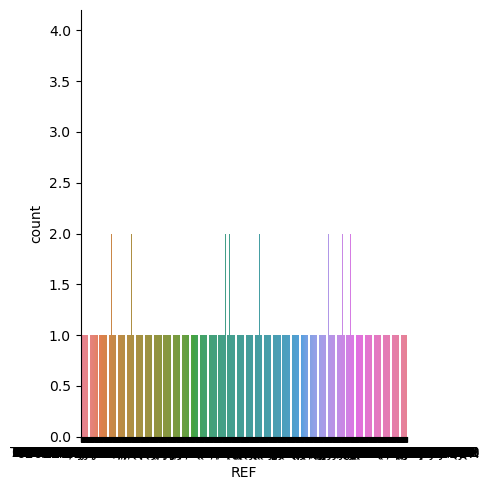

<Figure size 600x400 with 0 Axes>

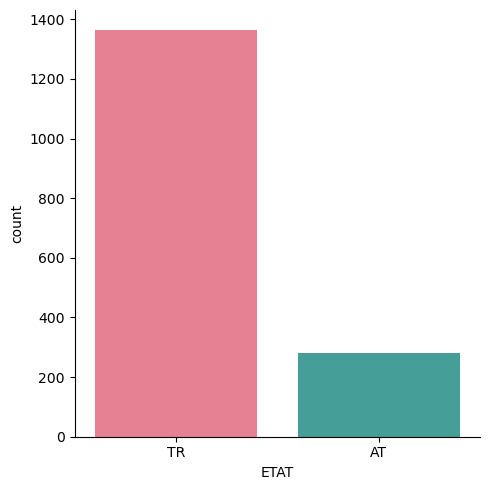

<Figure size 600x400 with 0 Axes>

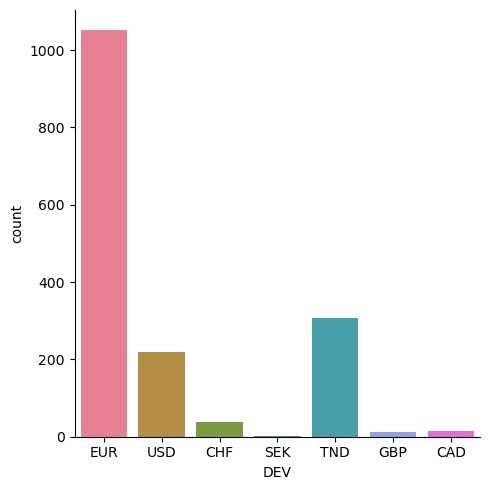

<Figure size 600x400 with 0 Axes>

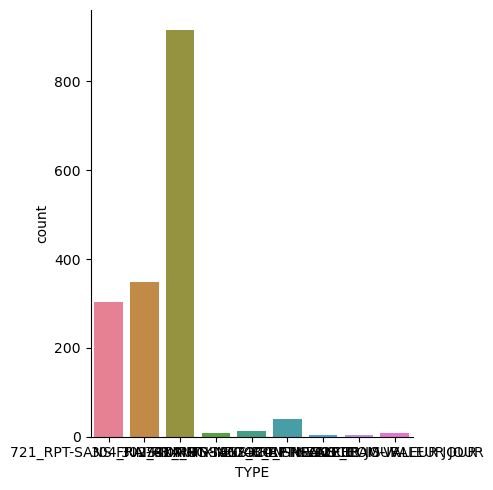

<Figure size 600x400 with 0 Axes>

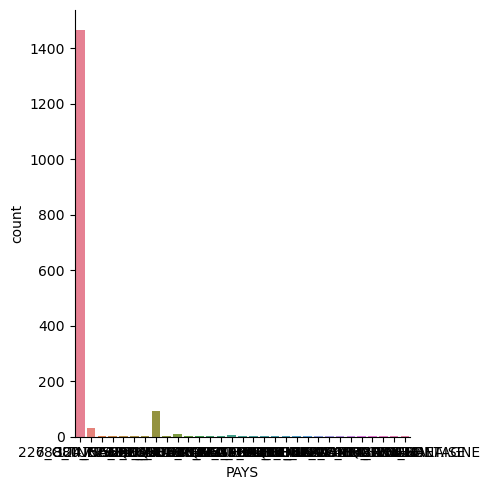

<Figure size 600x400 with 0 Axes>

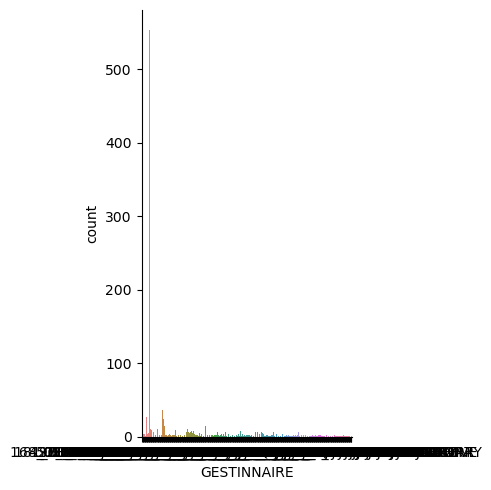

C:\Users\Abir\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Abir\AppData\Local\Temp\ipykernel_8032\2463766740.py:14: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 600x400 with 0 Axes>

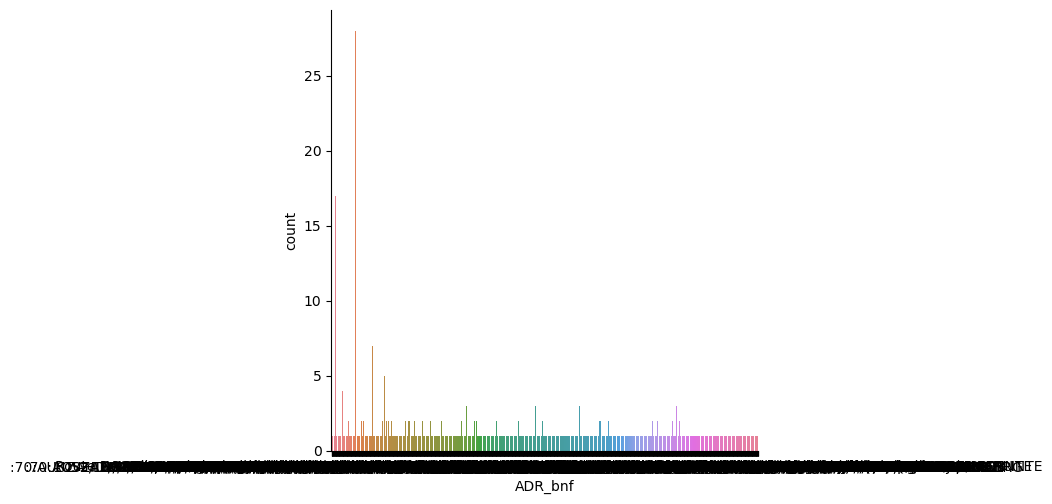

<Figure size 600x400 with 0 Axes>

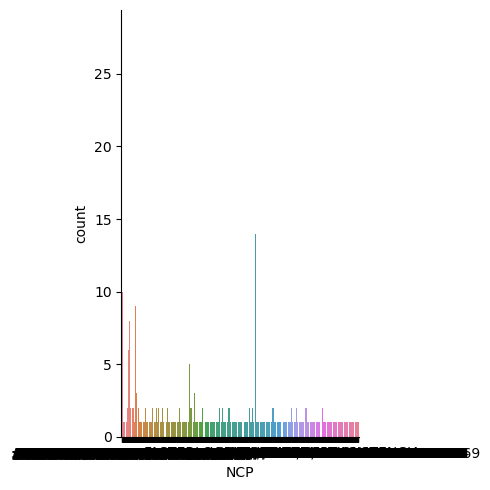

<Figure size 600x400 with 0 Axes>

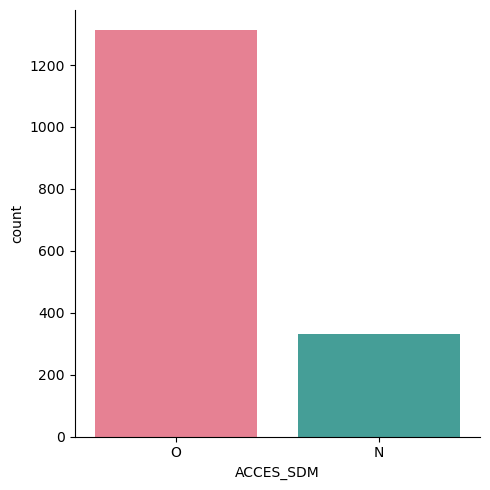

<Figure size 600x400 with 0 Axes>

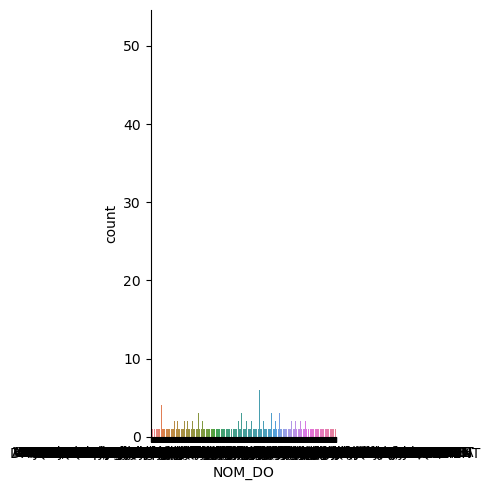

<Figure size 600x400 with 0 Axes>

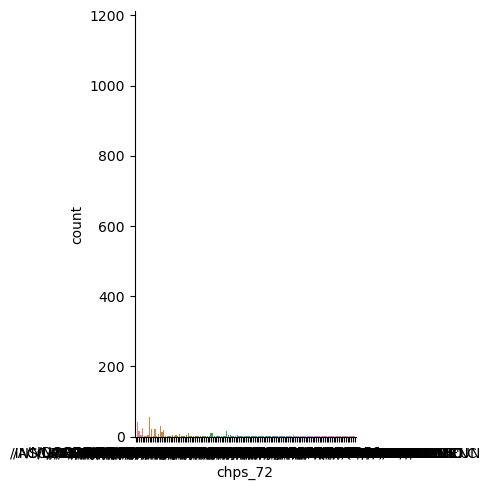

<Figure size 600x400 with 0 Axes>

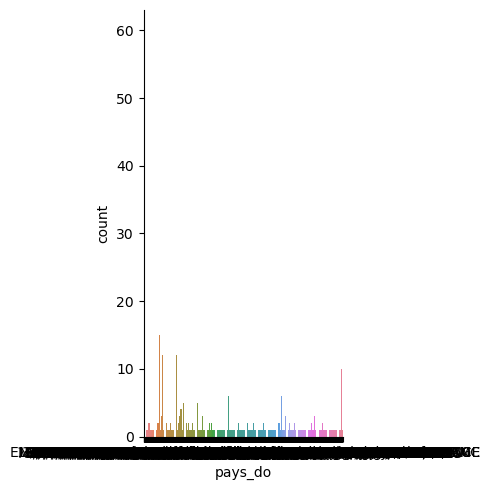

<Figure size 600x400 with 0 Axes>

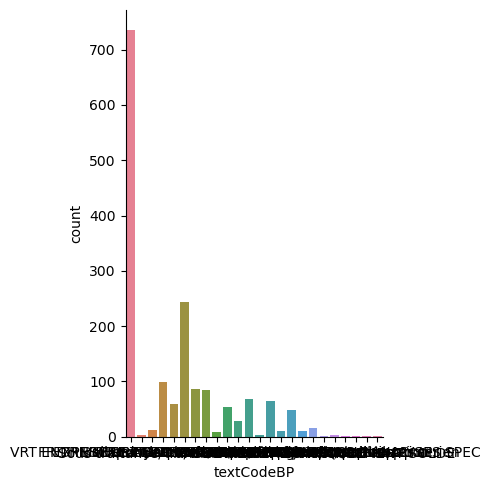

In [38]:
#Looking at categorical features
import matplotlib.pyplot as plt
import seaborn as sns

exclude_feature = "BEN_delta"

for column in cat_cols:
    if column == exclude_feature:
        continue  # Skip the iteration for the excluded feature
    
    plt.figure(figsize=(6, 4))
    sns.catplot(x=column, kind="count", data=df, palette='husl')
    plt.xlabel(column)
    plt.tight_layout()
    plt.show()


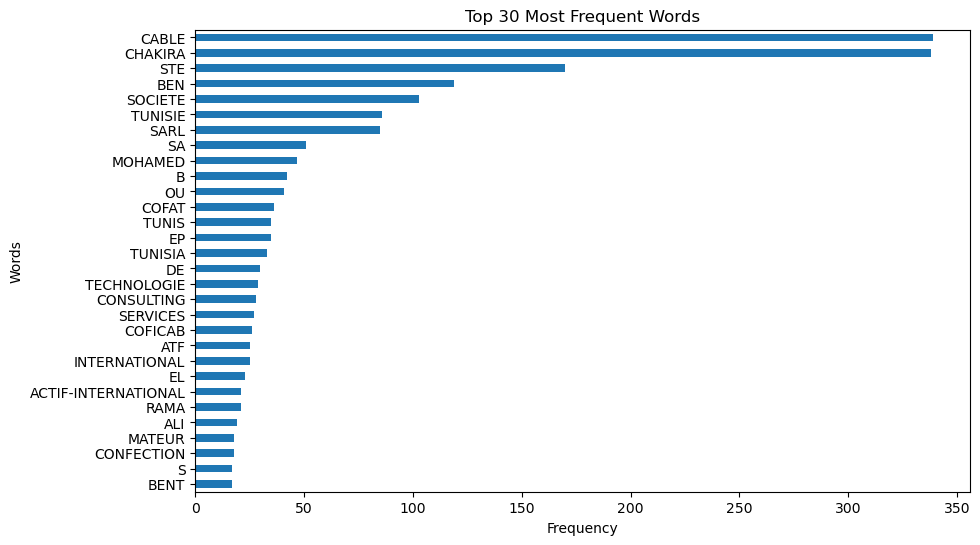

In [39]:
#Visualizing Ben_delta as it contains a large amount of text data
import pandas as pd
import matplotlib.pyplot as plt

text_data = " ".join(df['BEN_delta'])  # Combine all the text data into a single string

# Create a pandas Series with word frequencies
word_freq = pd.Series(text_data.split()).value_counts()

# Plot the top 20 most frequent words
plt.figure(figsize=(10, 6))
word_freq.head(30).sort_values().plot(kind='barh')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 30 Most Frequent Words')
plt.show()


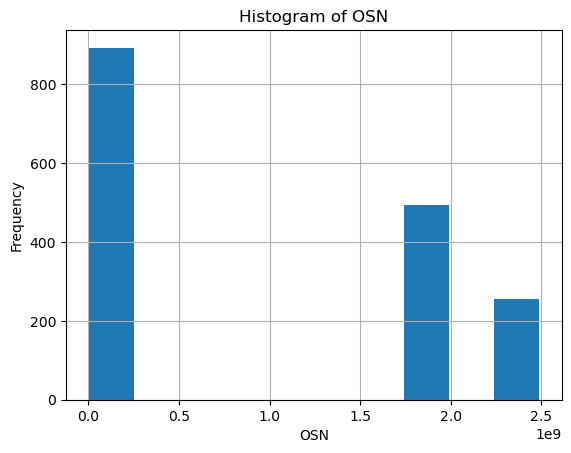

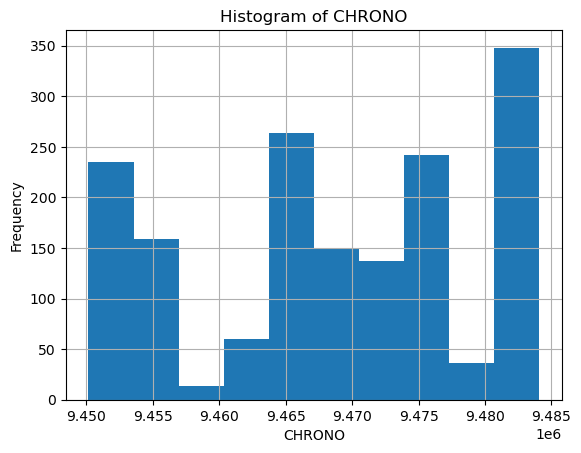

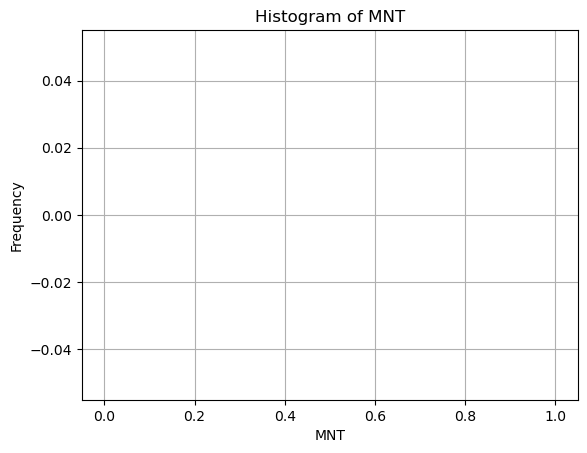

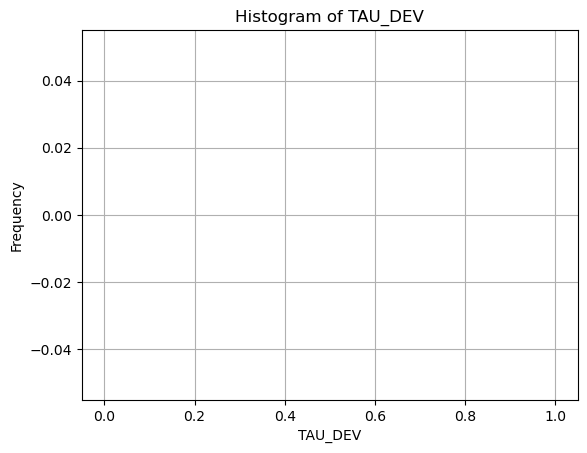

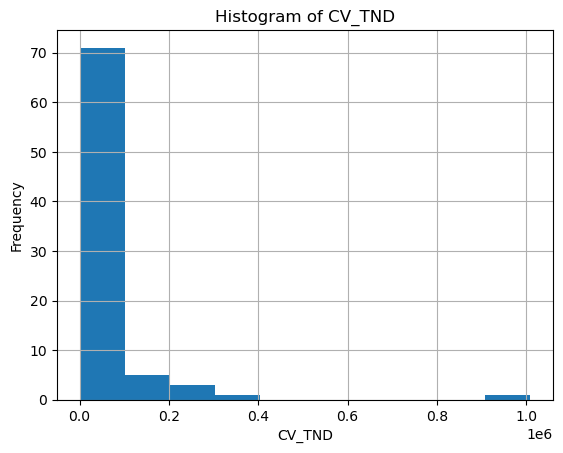

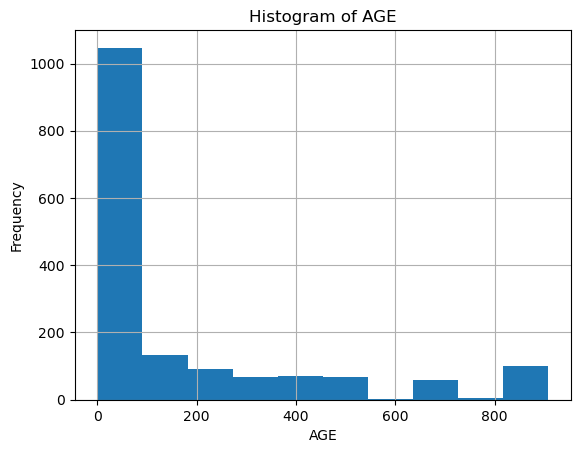

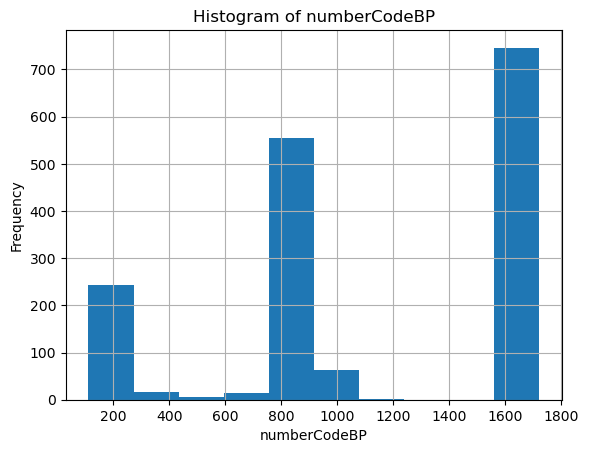

In [40]:
import matplotlib.pyplot as plt

# num_cols is a list of your numeric column names
for col in num_cols:
    df[col].hist()
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    plt.show()


In [41]:
#nbre d occ de chaque elt dans NOM_DO
col = 'NOM_DO'
value_counts = df[col].value_counts()
print(f"{col} has {len(value_counts)} unique values.")
print("Value counts:")
print(value_counts)


NOM_DO has 1187 unique values.
Value counts:
CNSS                                  52
AIRBNB PAYMENTS UK LTD                30
ENEDIS                                25
ETS.NATIONAL INVALIDES DE LA MARI     19
SOCIETE MEDLOG SARL                   10
                                      ..
CEFA COMITATO EUROPEO PER LA FORM      1
1/'HYPERTAC - SOCIETA' PER AZIONI'     1
LAZZARI S.R.L.                         1
 YOUSSEF TARCHOUN                      1
Quaker Houghton Sales B.V.             1
Name: NOM_DO, Length: 1187, dtype: int64


In [42]:
col = 'NOM_DO'
value_counts = df[col].value_counts()

for value, count in value_counts.items():
    print(f"{value}: {count} occurrence(s)")


CNSS: 52 occurrence(s)
AIRBNB PAYMENTS UK LTD: 30 occurrence(s)
ENEDIS: 25 occurrence(s)
ETS.NATIONAL INVALIDES DE LA MARI: 19 occurrence(s)
SOCIETE MEDLOG SARL: 10 occurrence(s)
UNITED NATIONS JOINT STAFF PENSION: 10 occurrence(s)
CAISSE AUTONOME DES RETRAITES: 9 occurrence(s)
SE BORDNETZE EL FEJJA: 9 occurrence(s)
UNITED NATIONS DEVELOPMENT PROGRAMM: 9 occurrence(s)
LEONI AG: 9 occurrence(s)
VOLKSWAGEN AKTIENGESELLSCHAFT: 9 occurrence(s)
CIMR: 8 occurrence(s)
SCANIA CV AB: 7 occurrence(s)
DEUTSCHE POST AG RENTEN SERVICE: 7 occurrence(s)
KROMBERG + SCHUBERT TUNISIE: 6 occurrence(s)
MACIF: 6 occurrence(s)
COMPAGNIE FINANCIERE ET DE PARTIC: 6 occurrence(s)
TUNISIE LEASING ET FACTORING: 6 occurrence(s)
GEOLOG MANPOWER SERVICES S. DE R.L.: 5 occurrence(s)
QUATREM: 5 occurrence(s)
DSV AS: 4 occurrence(s)
GOOGLE IRELAND LTD: 4 occurrence(s)
UNITED NATIONS: 4 occurrence(s)
DAV TUNISIE SA: 4 occurrence(s)
Volkswagen International Belgium: 4 occurrence(s)
DANY COOP: 4 occurrence(s)
STE SE BORD

In [43]:
# 0: Morale 
# 1: Physique 
#excluded_values = ['Peter wolf', 'Dany coop', 'Bati maya', 'Said Ayari', 'Tarik Unal', 'Kooli amna', 'ACHIR ADEL', 'AYARI SEIF', 'DIAF HATEM', 'ABID NAHLA', 'TARIK UNAL', 'OMRI AMAL']
#for i in range(len(df['NOM_DO'])):
#    value = df.loc[i, 'NOM_DO']
    
#    if value in excluded_values:
#        continue
    
#    if len(value) <= 10:
#        df.loc[i, 'NOM_DO'] = '0'
#    else:
#        df.loc[i, 'NOM_DO'] = '1'

### Detecting outliers 

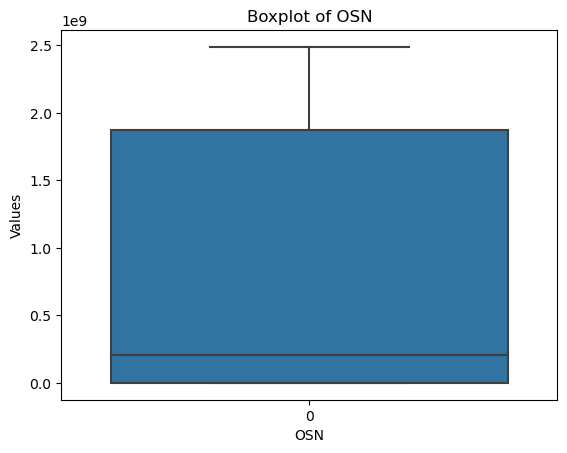

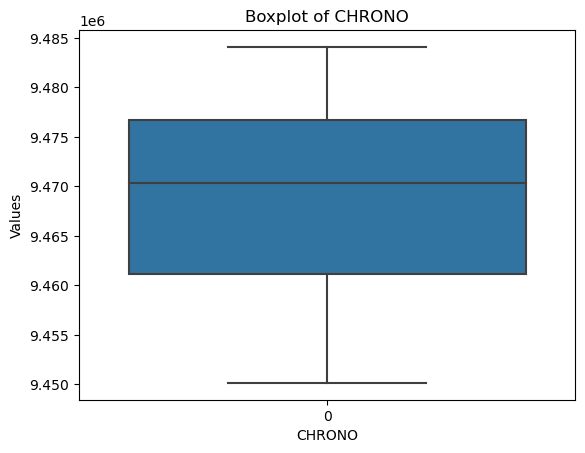

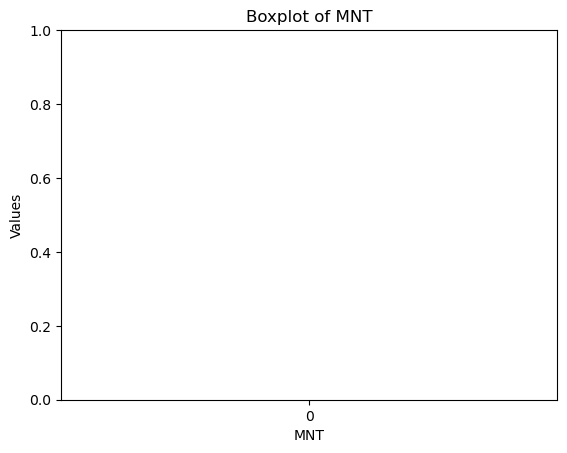

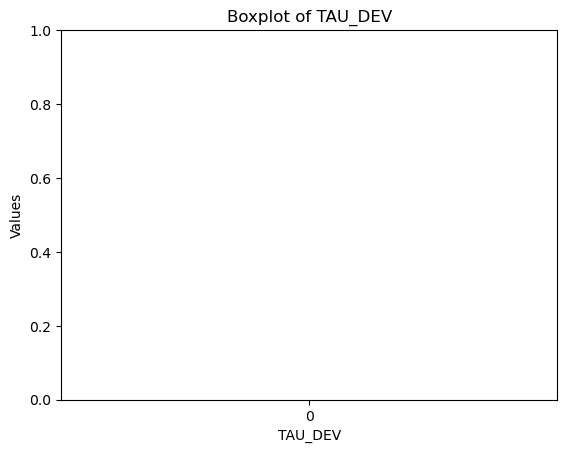

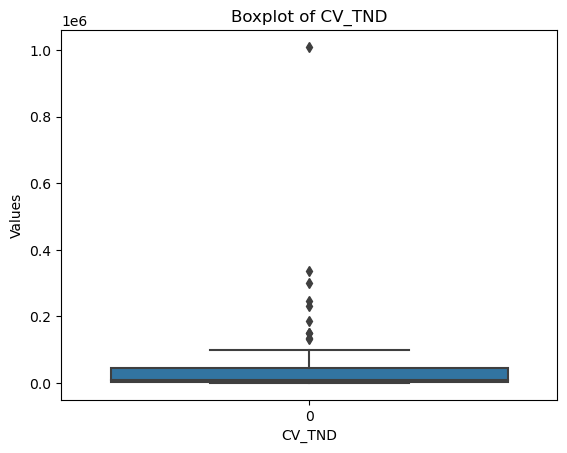

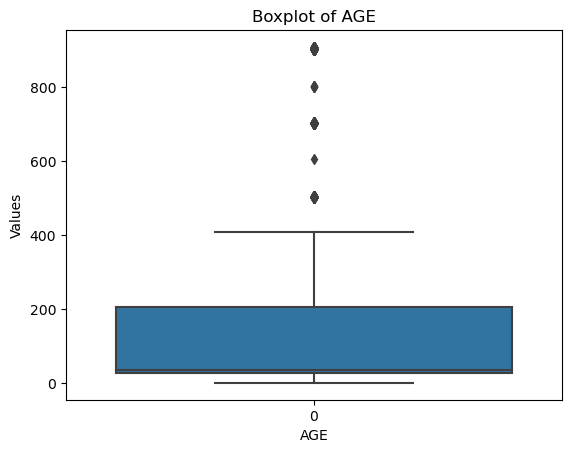

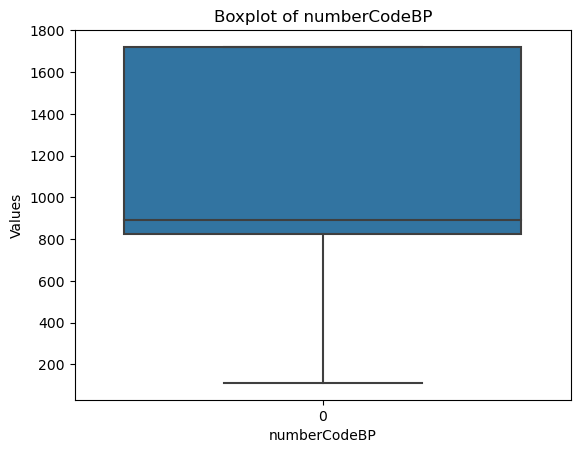

In [44]:
import seaborn as sns

# Suppose num_cols is a list of your numeric column names
for col in num_cols:
    plt.figure()
    sns.boxplot(data=df[col])
    plt.xlabel(col)
    plt.ylabel('Values')
    plt.title(f'Boxplot of {col}')
    plt.show()


In [45]:
# Extraire la position de l'outlier dans CV_TND
column = df['CV_TND']

# Calculate the mean and standard deviation of the column
mean = np.mean(column)
std = np.std(column)

# Set the threshold values (e.g., 3 standard deviations away from the mean)
threshold_upper = mean + 3 * std
threshold_lower = mean - 3 * std

# Find the positions of outliers
outlier_positions = np.where((column > threshold_upper) | (column < threshold_lower))[0]

# Print the positions of outliers
print("Outlier positions:", outlier_positions)


Outlier positions: [841]


In [46]:
# Drop outliers from the DataFrame
df = df.drop(outlier_positions)

In [47]:
# Extraire la position de l'outlier dans CV_TND
column = df['AGE']

# Calculate the mean and standard deviation of the column
mean = np.mean(column)
std = np.std(column)

# Set the threshold values (e.g., 3 standard deviations away from the mean)
threshold_upper = mean + 3 * std
threshold_lower = mean - 3 * std

# Find the positions of outliers
outlier_positions = np.where((column > threshold_upper) | (column < threshold_lower))[0]

# Print the positions of outliers
print("Outlier positions:", outlier_positions)


Outlier positions: []


##### Dealing with outliers AGE and CV_TND

In [48]:
for x in ['AGE']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    #remplacer les out par nan
    df.loc[df[x]<min,x]=df['AGE'].mean()
    df.loc[df[x]>max,x]=df['AGE'].mean()

<AxesSubplot:xlabel='AGE'>

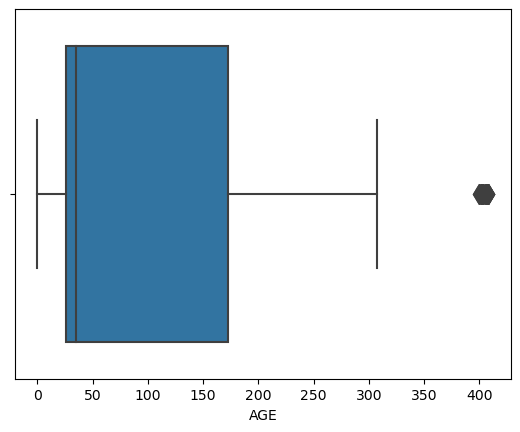

In [49]:
sns.boxplot(x=df["AGE"],fliersize=10,orient="h")

In [50]:
for x in ['CV_TND']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    #remplacer les out par nan
    df.loc[df[x]<min,x]=df['CV_TND'].mean()
    df.loc[df[x]>max,x]=df['CV_TND'].mean()

<AxesSubplot:xlabel='CV_TND'>

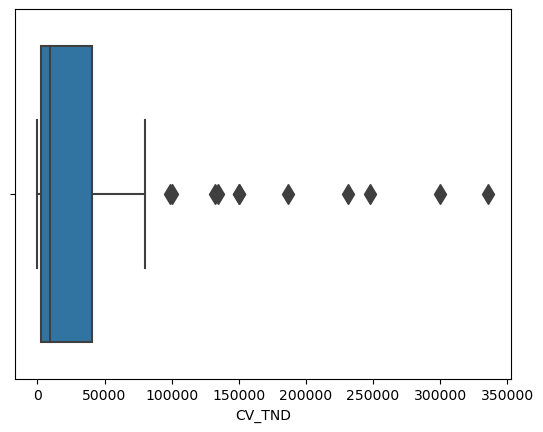

In [51]:
sns.boxplot(x=df["CV_TND"],fliersize=10,orient="h")

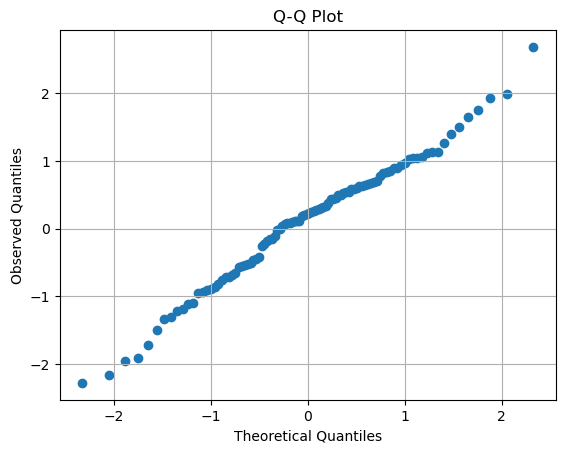

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Sample data (replace this with your own dataset)
data = np.random.normal(loc=0, scale=1, size=100)

# Sort the data
sorted_data = np.sort(data)

# Calculate theoretical quantiles for the normal distribution
theoretical_quantiles = stats.norm.ppf(np.linspace(0.01, 0.99, len(data)))

# Create the Q-Q plot
plt.scatter(theoretical_quantiles, sorted_data)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Observed Quantiles')
plt.title('Q-Q Plot')
plt.grid(True)
plt.show()


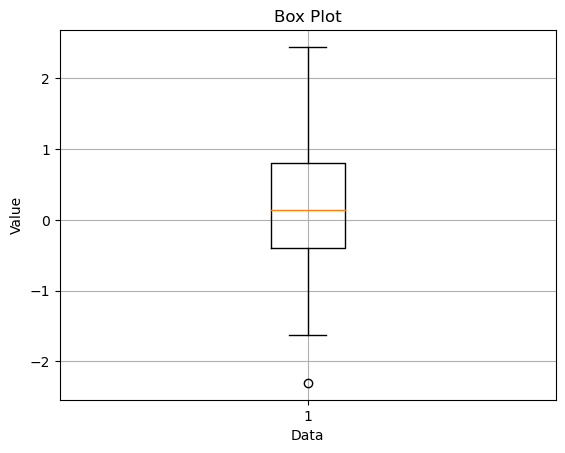

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace this with your own dataset)
data = np.random.normal(loc=0, scale=1, size=100)

# Create the box plot
plt.boxplot(data)
plt.xlabel('Data')
plt.ylabel('Value')
plt.title('Box Plot')
plt.grid(True)
plt.show()


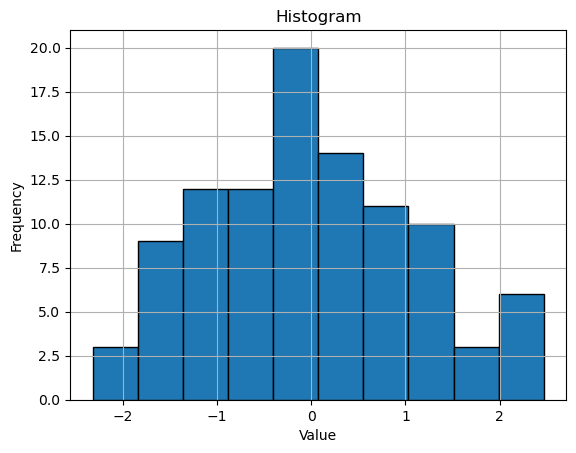

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace this with your own dataset)
data = np.random.normal(loc=0, scale=1, size=100)

# Number of bins (you can adjust this value)
num_bins = 10

# Create the histogram
plt.hist(data, bins=num_bins, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.grid(True)
plt.show()


### les features les plus pertinents 

In [55]:
# Count the number of features
num_features = df.shape[1]

# Print the number of features
print("Number of features:", num_features)


Number of features: 21


## Splitting 

In [56]:
ind_col = [col for col in df.columns if col != 'numberCodeBP']
class_label = 'numberCodeBP'

X = df[ind_col]
y = df[class_label]

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Generate a random multi-class classification dataset
X, y = make_classification(n_samples=1000, n_features=24, n_informative=10, n_classes=4, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### RFE : recursive Feature Elimination 

In [62]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

# define the estimator 
estimator = SVC(kernel="linear")

# Step 3: Create an instance of the RFE object, specifying the estimator and number of features to select
rfe = RFE(estimator=estimator, n_features_to_select=15)

# Step 4: Fit the RFE object to your data
rfe.fit(X, y)

# Step 5: Access the selected features and their rankings
selected_features = rfe.support_
feature_rankings = rfe.ranking_

# Filter the selected features and rankings for the top 21 features
selected_features = selected_features[:21]
feature_rankings = feature_rankings[:21]

# Print the selected features and their rankings
print("Selected Features:", selected_features)
print("Feature Rankings:", feature_rankings)


Selected Features: [ True  True  True False  True  True  True False False False False False
  True  True  True  True False  True  True False  True]
Feature Rankings: [ 1  1  1  7  1  1  1  3  5  9  6  2  1  1  1  1 10  1  1  4  1]


In [63]:
# Create a dictionary to match features with rankings
feature_rankings_dict = {feature: rank for feature, rank in zip(features, feature_rankings)}

# Print the features and their rankings
for feature, rank in feature_rankings_dict.items():
    print("Feature:", feature, "Rank:", rank)

Feature: OSN Rank: 1
Feature: CHRONO Rank: 1
Feature: REF Rank: 1
Feature: ETAT Rank: 7
Feature: MNT Rank: 1
Feature: DEV Rank: 1
Feature: TAU_DEV Rank: 1
Feature: CV_TND Rank: 3
Feature: TYPE Rank: 5
Feature: PAYS Rank: 9
Feature: GESTINNAIRE Rank: 6
Feature: BEN_delta Rank: 2
Feature: ADR_bnf Rank: 1
Feature: AGE Rank: 1
Feature: NCP Rank: 1
Feature: ACCES_SDM Rank: 1
Feature: NOM_DO Rank: 10
Feature: chps_72 Rank: 1
Feature: pays_do Rank: 1
Feature: numberCodeBP Rank: 4
Feature: textCodeBP Rank: 1


#### => features with a lower ranking are considered more important, but the specific interpretation of feature importance may depend on the algorithm and problem domain. ( 1 )

## Modeling : Logistic regression 

In [64]:
# Create a list to store the models
models = []

# Train multiple logistic regression models (one-vs-rest)
for class_label in set(y_train):
    # Create a binary target variable for the current class
    binary_y_train = [1 if y == class_label else 0 for y in y_train]
    
    # Create a logistic regression model for the current class
    model = LogisticRegression()
    
    # Train the model
    model.fit(X_train, binary_y_train)
    
    # Add the trained model to the list
    models.append(model)

# Make predictions using the trained models
y_pred = [model.predict(X_test) for model in models]

# Get the unique class labels
class_labels = np.unique(y_train)

# Combine the predictions to get the final predicted class labels
y_pred_final = [class_labels[np.argmax(pred)] for pred in zip(*y_pred)]

# Calculate the accuracy of the final predictions
accuracy = accuracy_score(y_test, y_pred_final)
print("Accuracy:", accuracy)


Accuracy: 0.68


In [65]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_final)
precision = precision_score(y_test, y_pred_final, average='macro')
recall = recall_score(y_test, y_pred_final, average='macro')
f1 = f1_score(y_test, y_pred_final, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.68
Precision: 0.7226829789833822
Recall: 0.6577710802363663
F1-score: 0.6716134473713159


#### Apply the regularization to the model 

In [66]:
# Create a Logistic Regression model with L1 regularization (Lasso)
model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7
